In [107]:
#
# Preprocessing data
#
#
import math
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
from numpy.linalg import inv

f=open("./auto-mpg.data","r")
ff = f.read()
lines = ff.split('\n')

#parse data in list of lists
d = []
for line in lines:
#line: 18.0   8   307.0      130.0      3504.      12.0   70  1	"chevrolet chevelle malibu"
    b = line.split("\t")[0]
    #b:["18.0   8   307.0      130.0      3504.      12.0   70  1"]
    if("?" in b):
        continue
        
    b = b.split()
    #b is a list of strs now 
    b = [float(i) for i in b]
    #b is a list of floats now
    d.append(b)
    
d.pop()

#convert into np array
np.set_printoptions(suppress=True)
data = np.array(d)

#convert to dataframe
data_df = pd.DataFrame(data=data, dtype = "float",
                    columns=["mpg","cylinders", "displacement", "horsepower", 
                             "weight", "acceleration", "model_year", "origin"])

print(data.shape)
print(data[:3])

(392, 8)
[[  18.     8.   307.   130.  3504.    12.    70.     1. ]
 [  15.     8.   350.   165.  3693.    11.5   70.     1. ]
 [  18.     8.   318.   150.  3436.    11.    70.     1. ]]


In [108]:
#
# Problem 1: Find threshold
#
#
# data_df["mpg_cater"] = pd.cut(data_df["mpg"], 4, labels=['low', 'medium', 'high', 'very high'])

sorted = data[data[:,0].argsort()]

t1 = sorted[97][0]
t2 = sorted[195][0]
t3 = sorted[293][0]
print(f"threshold 1: {t1}")
print(f"threshold 2: {t2}")
print(f"threshold 3: {t3}")

low = 0
med = 0
high = 0
vhigh = 0



cat = []

for i in range(392):
    if(data_df["mpg"][i] <= t1):
        cat.append("low")
        low +=1
    elif(data_df["mpg"][i] <= t2):
        med +=1
        cat.append("medium")
    elif(data_df["mpg"][i] <= t3):
        high +=1   
        cat.append("high")
    else:
        vhigh +=1
        cat.append("very high")
data_df["mpg_cater"] = cat
print(low)
print(med)
print(high)
print(vhigh)
        

        

threshold 1: 17.0
threshold 2: 22.5
threshold 3: 29.0
99
97
101
95


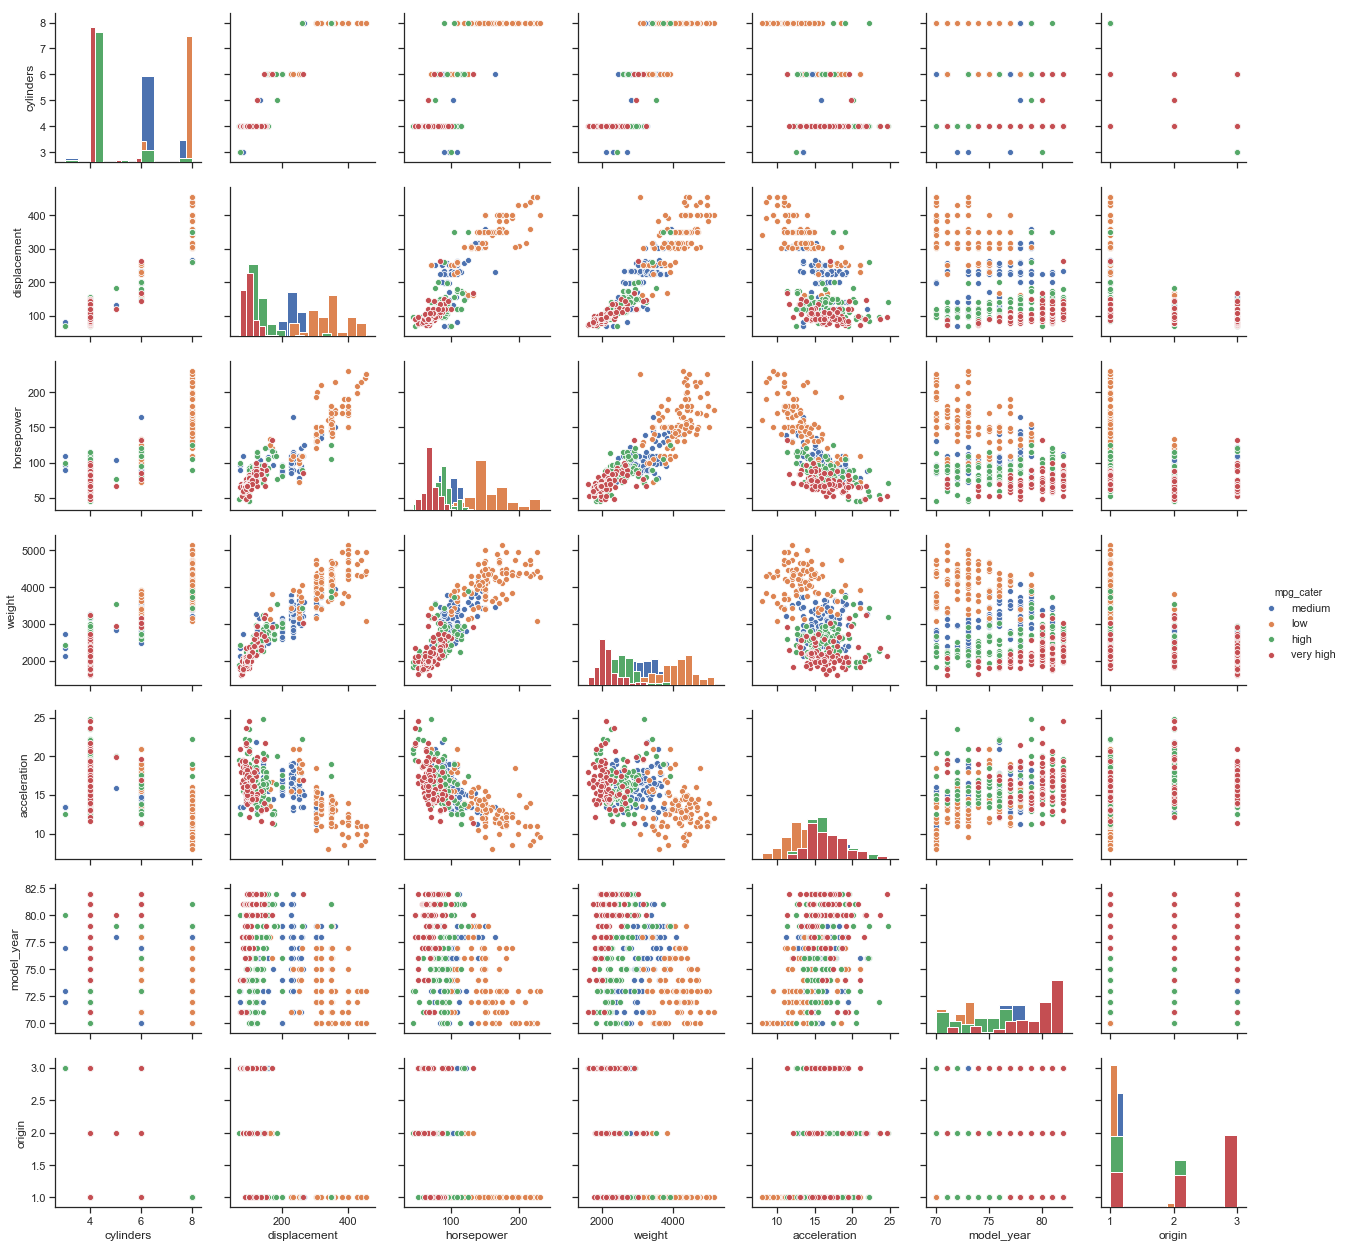

In [109]:
#
# Problem 2: print 2D scatterplot matrix
#

#spm = pd.plotting.scatter_matrix(data_df, alpha=0.8, figsize=(20, 20), diagonal='hist')
#spm.view()

import seaborn as sns; sns.set(style="ticks", color_codes=True)
sns_plot = sns.pairplot(data_df, hue="mpg_cater", vars = ["cylinders", "displacement", "horsepower", 
                             "weight", "acceleration", "model_year", "origin"], diag_kind = "hist")

sns_plot.savefig("output.png")


In [110]:
#
# Problem 3: linear regression solver on a single variable for prediction of MPG. 
#

# data  : full data
# x_ind : index of col to be x
# y_ind : index of col to be y
# M     : num of objects
# i     : i th polynomial
def singleVarLRSolver(data, x_ind, y_ind, M, i):
    #parse Y
    y = np.array([row[y_ind] for row in data])
    y = np.reshape(y, [M, 1])
    
    #parse X
    x = np.ones([M,1])
    temp = np.array([row[x_ind] for row in data])
    temp = np.reshape(temp, [M, 1])
    for pw in range(i):
        pw += 1
        x = np.append(x, temp**pw, axis = 1)
    w = np.matmul(inv( np.matmul(np.transpose(x), x)), np.matmul(np.transpose(x), y))  #(X^T * X)^-1 * (X^T * Y)
    return w

#test-------------------------------------------------------------
d = np.array([[1, 6],
              [2, 14],
              [3, 26]])
print(d)
x = 0
y = 1
M = 3
i = 2
     
print(singleVarLRSolver(d, x, y, M, i))


[[ 1  6]
 [ 2 14]
 [ 3 26]]
[[2.]
 [2.]
 [2.]]


Training Data for cylinders
0th MSError: 61.19885379527116
1th MSError: 25.13514153596718
2th MSError: 24.923716914121137
3th MSError: 22.99023783234904
Testing Data for cylinders
0th MSError: 59.78863182116719
1th MSError: 20.9731683475693
2th MSError: 20.95424080532858
3th MSError: 18.559105151934954
min: 1.7000000000000002 max: 49.730000000000004 


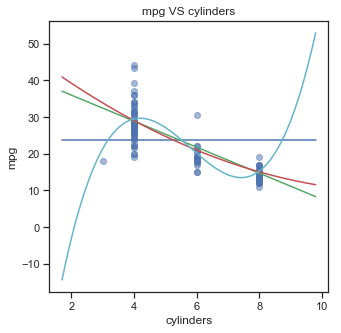



---------------------------------------------------------------------

Training Data for displacement
0th MSError: 61.19885379527116
1th MSError: 21.745691230745607
2th MSError: 19.506411953135228
3th MSError: 19.41948181381831
Testing Data for displacement
0th MSError: 59.78863182116719
1th MSError: 20.460871180014855
2th MSError: 17.34807552372795
3th MSError: 17.419005102178748
min: 62.0 max: 49.730000000000004 


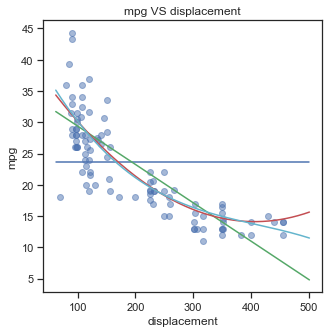



---------------------------------------------------------------------

Training Data for horsepower
0th MSError: 61.19885379527116
1th MSError: 24.446321261898536
2th MSError: 21.068445643557443
3th MSError: 21.06744110384218
Testing Data for horsepower
0th MSError: 59.78863182116719
1th MSError: 22.60532601943209
2th MSError: 13.24736277792452
3th MSError: 13.206941679826317
min: 42.2 max: 49.730000000000004 


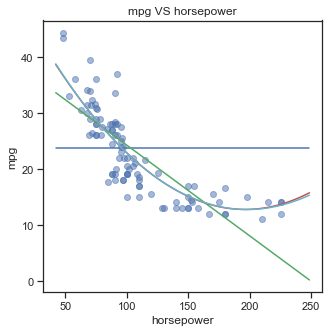



---------------------------------------------------------------------

Training Data for weight
0th MSError: 61.19885379527116
1th MSError: 18.677619640281087
2th MSError: 17.461791479142864
3th MSError: 17.46080254596815
Testing Data for weight
0th MSError: 59.78863182116719
1th MSError: 18.758605725109323
2th MSError: 16.926076562480183
3th MSError: 16.930408667108544
min: 1614.5 max: 49.730000000000004 


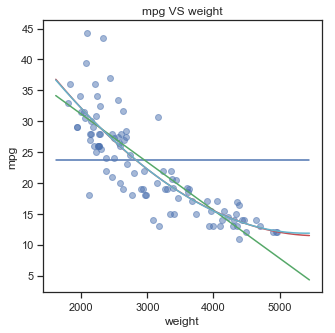



---------------------------------------------------------------------

Training Data for acceleration
0th MSError: 61.19885379527116
1th MSError: 52.18295380777401
2th MSError: 51.138642741066334
3th MSError: 51.06505376022549
Testing Data for acceleration
0th MSError: 59.78863182116719
1th MSError: 43.66047175107929
2th MSError: 43.131928641680794
3th MSError: 42.995261255844504
min: 6.65 max: 49.730000000000004 


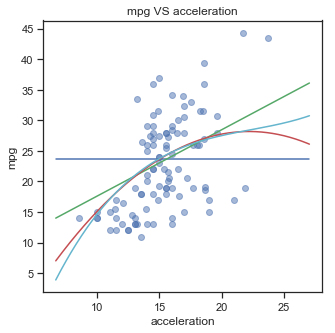



---------------------------------------------------------------------

Training Data for model_year
0th MSError: 61.19885379527116
1th MSError: 40.533805277871956
2th MSError: 37.91542582959237
3th MSError: 37.90090059585362
Testing Data for model_year
0th MSError: 59.78863182116719
1th MSError: 39.624108016484186
2th MSError: 40.26522673410889
3th MSError: 40.117454223323804
min: 62.0 max: 49.730000000000004 


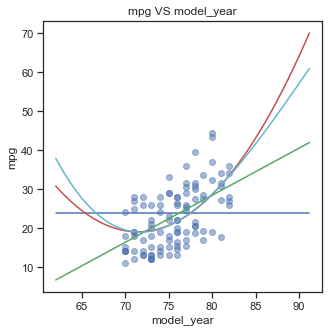



---------------------------------------------------------------------

Training Data for origin
0th MSError: 61.19885379527116
1th MSError: 41.51530313664526
2th MSError: 41.08143618545709
3th MSError: 84696.97462328766
Testing Data for origin
0th MSError: 59.78863182116719
1th MSError: 41.23930247929875
2th MSError: 39.71952413542627
3th MSError: 88635.01150000001
min: -0.09999999999999998 max: 49.730000000000004 


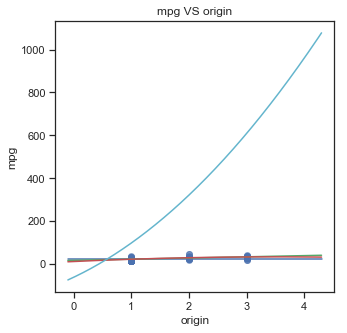



---------------------------------------------------------------------

The smalles MSE is 13.206941679826317, it has feature " horsepower " and it is the 3 th polynomial


In [111]:
# Problem 4: 
#    plots,
#    7(feature) * 4(polynomial order) * 2(testing and training data) --- 
#                                           -- mean squared error for train and testing data,
#    feature and polynomial order for the min MSE 
#

from sklearn.metrics import mean_squared_error

# Ws             : list of w: length should be 4
# title          : title for the figure
# x_a            : data for x axis
# y_a            : data for y axis
# start, stop    : [start, stop] is the range of x for the figure
# xlabel, ylabel : for the figure
def pltlines(Ws, title, x_a, y_a, start, stop, xlabel, ylabel):
    fig = plt.figure(figsize=(5,5))
    plt.scatter(x_a, y_a, alpha=0.5)
    plt.title(title, figure=fig)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    a = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    x = np.linspace(start,stop,1000)
    
    for w in Ws:
        y=0
        for p, wx in enumerate(w):
            y += wx * x**p
        plt.plot(x, y, a[p])

    
    s = title + ".png"

    plt.show()
    fig.savefig(s)
    plt.close()

# Ws : list of w: length should be 4
# x_i : x of the error to be caculated
# y_true : true value of y
def MSError(Ws, x_i, y_true):
    error = []
    x_i = np.array(x_i)
    for c, w in enumerate(Ws):
        y_pred = np.zeros(len(y_true))
        for p, wx in enumerate(w):
            y_pred += wx * x_i**p
            
        error.append(mean_squared_error(y_true, y_pred))
        
    for c, e in enumerate(error):
        print(f"{c}th MSError: {e}")
        
    me = min(error)
    return [error.index(me), me]
#return a list with [(index of min error), min error]

#------------------------------------------------------------------------------------------------

#1.shuffle the data
#2.plot with test data
np.random.seed(5)  
shuffled = np.random.permutation(data)

train = shuffled[:292]
test  = shuffled[292:392]
t = ["mpg","cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"]
ws = []
minMSE = 100000

min_title = ""
min_ith = 0

for c in range(7):
    #7 features: 1-7
    c +=1
    
    # 1. get Ws
    for i in range(4):
        ws.append(singleVarLRSolver(train, c, 0, 292, i))
    
    # 2. train MSE
    print(f"Training Data for {t[c]}")
    x_i = [row[c] for row in train]
    y_i = [row[0] for row in train]
    MSError(ws, x_i, y_i)
    
    # 3. test MSE
    print(f"Testing Data for {t[c]}")
    tx = [row[c] for row in test]
    ty = [row[0] for row in test]
    e_test = MSError(ws, tx, ty)
    
    # 4. plot lines
    title = "mpg VS " + t[c]
    print(f"min: {min(tx)*0.9 - 1} max: {max(ty)*1.1 +1} ")
    pltlines(ws, title, tx, ty, min(tx)*0.9 - 1,  max(tx)*1.1 +1, t[c], t[0])

    
    print('\n')

    
    # 5. find min MSE for test data
    if(minMSE >= e_test[1]):
        min_ith = e_test[0]
        min_title = t[c]
        minMSE = e_test[1]
    
    print("---------------------------------------------------------------------\n")
    ws.clear()
    #end for loop
#end for loop

print(f"The smalles MSE is {minMSE}, it has feature \" {min_title} \" and it is the {min_ith} th polynomial")

In [112]:
#
#
# Problem 5:  solver on all 7 independent variables of 0th, 1th, 2th polynomial order and their MSE
#
#
#
def multiVarLRSolver(shuffled, y_ind, order):
    row_size = shuffled.shape[0]
    col_size = shuffled.shape[1]
    
    #get y_true (392, 1)
    y_true = [row[y_ind] for row in shuffled]
    y_true = np.reshape(y_true, [row_size, 1])
    
    #get x_mat
    x_mat = np.ones([row_size, 1])
    for i in range(order):
        for j in range(col_size):
            if(j==y_ind): continue
            x_temp = [pow(row[j], i+1) for row in shuffled]
            x_temp = np.reshape(x_temp, [row_size, 1])
            x_mat = np.append(x_mat, x_temp, axis =1)

    w = np.matmul(inv( np.matmul(np.transpose(x_mat), x_mat)), np.matmul(np.transpose(x_mat), y_true))
    return w


def MSError_allfeature(w, data, y_ind, order):
    row_size = data.shape[0]
    col_size = data.shape[1]
    
    #get y_true (392, 1)
    y_true = [row[y_ind] for row in data]
    y_true = np.reshape(y_true, [row_size, 1])
    
    #get x_mat
    x_mat = np.ones([row_size, 1])
    for i in range(order):
        for j in range(col_size):
            if(j==y_ind): continue
            x_temp = [pow(row[j], i+1) for row in data]
            x_temp = np.reshape(x_temp, [row_size, 1])
            x_mat = np.append(x_mat, x_temp, axis =1)
            
    y_pred = np.matmul(x_mat, w)
    error = mean_squared_error(y_true, y_pred)
    return error

# 1. get Ws
np.random.seed(5)  
shuffled = np.random.permutation(data)

train = shuffled[:292]
test  = shuffled[292:392]
ws = []

for i in range(3):
    ws.append(multiVarLRSolver(shuffled, 0, i))
    print(f"{i}th polynomial:")
    print(f"Train MSE: {MSError_allfeature(ws[i], train, 0, i)}")
    print(f"Test MSE: {MSError_allfeature(ws[i], test, 0, i)}\n")




0th polynomial:
Train MSE: 61.275218644628666
Test MSE: 59.26629625156184

1th polynomial:
Train MSE: 10.698517232878423
Test MSE: 11.282454984396775

2th polynomial:
Train MSE: 7.399631867963279
Test MSE: 7.031008593668345



In [113]:
# retreat from https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
# Problem 6: logistic regression on data 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

feature = ["cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin"]
X = data_df[feature]
y = data_df["mpg_cater"]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.8, random_state=0)

logreg = LogisticRegression()    # instantiate the model (using the default parameters)
logreg.fit(X_train,y_train)      # fit the model with data

y_pred=logreg.predict(X_test)    # predict test data
pre = metrics.precision_score(y_test, y_pred, average = None)
print("Precision for test data:")
print(f"\tLow: {pre[0]}]\n\tMedium: {pre[1]}\n\tHigh: {pre[2]}\n\tVery high: {pre[3]} ")

count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples for test data: {}'.format(count_misclassified))

y_pred=logreg.predict(X_train)   # predict train data
pre = metrics.precision_score(y_train, y_pred, average = None)
print("Precision for train data:")
print(f"\tLow: {pre[0]}]\n\tMedium: {pre[1]}\n\tHigh: {pre[2]}\n\tVery high: {pre[3]} ")

# accuracy
count_misclassified = (y_train != y_pred).sum()
print('Misclassified samples for train data: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_train, y_pred)
print('Accuracy for train data : {:.2f}'.format(accuracy))

#cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
#print(cnf_matrix)
x1 = [[4, 400, 150, 3500, 8, 81, 1]]
y_pred=logreg.predict(x1)
print(f"The predicted mpg category using logistic regression: {y_pred[0]}")

Precision for test data:
	Low: 0.6185567010309279]
	Medium: 0.8641975308641975
	High: 0.6338028169014085
	Very high: 0.8461538461538461 
Misclassified samples for test data: 84
Precision for train data:
	Low: 0.7894736842105263]
	Medium: 0.8947368421052632
	High: 0.8235294117647058
	Very high: 0.8695652173913043 
Misclassified samples for train data: 12
Accuracy for train data : 0.85
The predicted mpg category using logistic regression: high


/Users/kevin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kevin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [114]:
# Problem 7: apply max-min nomarlization on data and do logistic regression again

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)                  # Fit on training set only.
X_train = scaler.transform(X_train)  # Apply transform to both the training set and the test set.
X_test = scaler.transform(X_test)    # Apply transform to both the training set and the test set.

logreg.fit(X_train,y_train)      # fit the model with data

y_pred=logreg.predict(X_test)    # predict test data
pre = metrics.precision_score(y_test, y_pred, average = None)
print("Precision for test data:")
print(f"\tLow: {pre[0]}]\n\tMedium: {pre[1]}\n\tHigh: {pre[2]}\n\tVery high: {pre[3]} ")


y_pred=logreg.predict(X_train)   # predict train data
pre = metrics.precision_score(y_train, y_pred, average = None)
print("Precision for train data:")
print(f"\tLow: {pre[0]}]\n\tMedium: {pre[1]}\n\tHigh: {pre[2]}\n\tVery high: {pre[3]} ")

# accuracy
count_misclassified = (y_train != y_pred).sum()
print('Misclassified samples for train data: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_train, y_pred)
print('Accuracy for train data : {:.2f}'.format(accuracy))

Precision for test data:
	Low: 0.6818181818181818]
	Medium: 0.813953488372093
	High: 0.6964285714285714
	Very high: 0.6226415094339622 
Precision for train data:
	Low: 0.75]
	Medium: 0.7272727272727273
	High: 0.7692307692307693
	Very high: 0.6451612903225806 
Misclassified samples for train data: 23
Accuracy for train data : 0.71


/Users/kevin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kevin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [115]:
# Problem 8

# create x
x1 = [4, 400, 150, 3500, 8, 81, 1]
for i in range(7):
    x1.append(x1[i]**2)
x1.insert(0,1)
w = multiVarLRSolver(shuffled, 0, 2)
print(f"Predicted mpg with second-order, multi-variate polynomial: {np.matmul(x1, w)[0]}")


X = data_df[feature]
y = data_df["mpg_cater"]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.8, random_state=0)

logreg = LogisticRegression()    # instantiate the model (using the default parameters)
logreg.fit(X_train,y_train)      # fit the model with data

x1 = [[4, 400, 150, 3500, 8, 81, 1]]
y_pred=logreg.predict(x1)
print(f"The predicted mpg category using logistic regression: {y_pred[0]}")

Predicted mpg with second-order, multi-variate polynomial: 23.80269318921046
The predicted mpg category using logistic regression: high


/Users/kevin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kevin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
